# Seminario de Ciencia de Datos
## 2º Cuatrimestre de 2017

## Módulo 1 - Análisis Básicos

## Integrantes:

- Mascitti, Julio Augusto - 954/11 - mascittija@gmail.com
- Beccar García, Augusto - 267/13 - abg101@gmail.com
- Guerson, Matias Carlos - 925/10 - matias.guerson@gmail.com


## Introducción

En este trabajo tenemos por objetivo comenzar a conocer algunas técnicas de tests estadísticos, además de empezar a familiarizarnos con las diversas formas de representar y visualizar los datos con los que trabajamos.
Para esto, utilizando datos provistos por la cátedra, vamos a realizar análisis sobre tiempos recolectados de entrenamientos de 12 atletas de 100m llanos. Los mismos fueron medidos para distintas condiciones climáticas (días soleados, nublados y con lluvia). En base a estos datos y mediante el procesamiento de la información con librerías de Python, vamos a intentar corroborar o refutar algunas hipótesis planteadas.

Importando Librerias

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import functools as func

# Exploración Preliminar y Gráficos


## Primeros gráficos

Importamos los datos desde el archivo provisto por la catedra, para tener un primer pantallazo de los dátos con los cuales vamos a trabajar.

    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
0        1        11.1            11.3           19.4
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
6        7        15.1            14.6          189.0
7        8        14.4            14.2           19.9
8        9        16.1            16.1           18.5
9       10        17.0            16.7           19.2
10      11        12.2            12.4           18.8
11      12        14.4            14.1           19.2


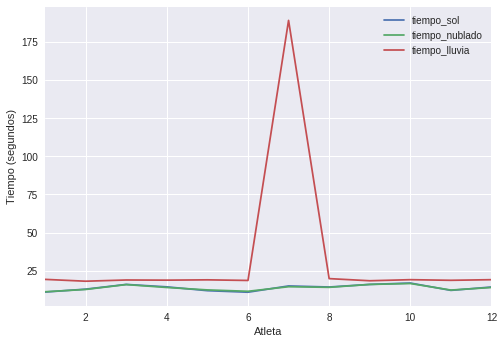

In [6]:
datos = pd.read_csv('./tiempos.txt', sep=' ')

def graficar(datos):
    ax = datos.plot(x=datos['Atleta'], y=list(datos)[1:])
    ax.set_ylabel("Tiempo (segundos)")
    sns.plt.show()

print(datos)
graficar(datos)

## Eliminando los outliers

Lo primero que podemos observar es la precencia de un outlier, el cual distorisiona el gráfico, haciendolo inútil para un análisis rápido de los datos y contamina la muestra para los distintos experimentos que vamos a realizar. Por dicho motivo decidimos eliminar dicho outlier.

Para algunos experimentos necesitamos que las muestras tengan la misma cantidad de datos, por lo tanto no podemos eliminar solo la medición errónea del atleta numero 7 en los días de lluvia.
En un momento pensamos en arreglar el dato, pues viendo los mismos, podemos inferír que es un error de carga en el punto decimal del mismo. Tuvimos esta discusión en el grupo, ya que al ser una muestra de solo 12 atletas, quitar 1 atleta de los datos, implica la reducción en casi un 10%.
Al final, decidimos no hacerlo, pues en un escenario real no siempre se pueden realizar estas asunciones y el proceso de eliminación de outliers se realiza en función de la muestra obtenida.

Para la eliminación del outiler, el criterio utilizado, fue eliminar todos aquellos que esten a más de 3 desvíos estandares de la media de los datos de la muestra.

    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
0        1        11.1            11.3           19.4
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
7        8        14.4            14.2           19.9
8        9        16.1            16.1           18.5
9       10        17.0            16.7           19.2
10      11        12.2            12.4           18.8
11      12        14.4            14.1           19.2


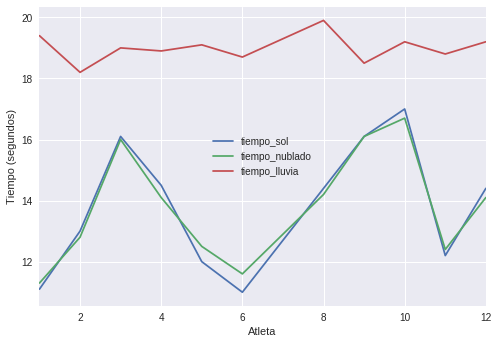

In [7]:
datosLimpios = datos[np.abs(datos - datos.mean())<=(3*datos.std())].dropna(how='any')
print(datosLimpios)
graficar(datosLimpios)

Luego de limpiar los datos, un análisis rápido de los mismos en base al gráfico, es que tanto los días de sol como los nublados, los tiempos de los corredores son parecidos. En cuanto a los días de lluvia, para todos los corredores sus tiempos se incrementan considerablemente. Esto no es más que una primera noción utilizando el gráfico con el fin de entender cómo se distribuyen los datos de la muestra dada.

## T-Tests

Durante este trabajo haremos uso de algunos de los T-Tests existentes, por lo que antes que nada y para poder hacer uso de dichos tests, debemos corroborar si nuestros datos cumplen con las hipótesis requeridas.

Las hipótesis a cumplir son las siguientes:

- Muestras independientes
- Distribuciones Normales
- Igual Varianza de los datos

### Hipótesis 1: Muestras independientes

Podemos asumir que las muestras son independientes, ya que el tiempo de un atleta, no se ve afectado en relación al tiempo que puede haber realizado otro atleta.
El tiempo de cada atleta es independiente de cualquier otro suceso, salvo las condiciones específicas de ese atleta en ese momento.

### Hipótesis 2: Distribución Normal

En este caso, para corroborar que los datos provengan de una distribución normal, decidimos utilizar un test sugerido en la cátedra, este es el test de Shapiro. Este test sirve para testear la hipótesis nula de que los datos fueron extraídos de una distribución normal. En caso de que obtengamos un valor del p-value menor a 0.05, estaríamos en condiciones de rechazar dicha hipótesis. Es importante aclarar dos cosas acá:

- El hecho de obtener un valor mayor a 0.05 no implica que los datos provengan de una distribución normal, sino que no podemos rechazar la idea de que sea así.
- La cota 0.05 es un número definido arbitrariamente bajo ciertos criterios y hoy es aceptada globalmente. Aún así, dependiendo del tipo de estudio que se esté haciendo y del grado de aceptación que se quiera tener, este número podría variar. En nuestro caso tomaremos siempre este valor como referencia.

In [13]:
def normal_dist(data):
    t,p_value = sp.stats.shapiro(data)
    print(p_value)
    return p_value > 0.05

datos_normales = func.reduce(lambda acc, x: acc and normal_dist(datosLimpios[x]),list(datosLimpios)[1:], True)

print(datos_normales)

0.42219114303588867
0.3774447739124298
0.9883151054382324
True


Sometimos los tres sets de datos al test de Shapiro y como podemos ver, para todos los casos hemos observado que no podemos rechazar la hipótesis de que la muestra provenga de una distribución normal. Por lo que asumiremos que los datos si provienen de una distribución normal y daremos por cumplida esta hipótesis.

Como bien sabemos, de esta forma no podemos afirmar que los datos sí provengan de distribuciones normales, por lo que, para tratar de complementar este análisis, decidimos graficar los histogramas de los datos y analizar gráficamente si los mismos presentan una curva similar a la característica de las distribuciones normales. Si bien este método no es para nada riguroso, puede llegar a ser de ayuda.


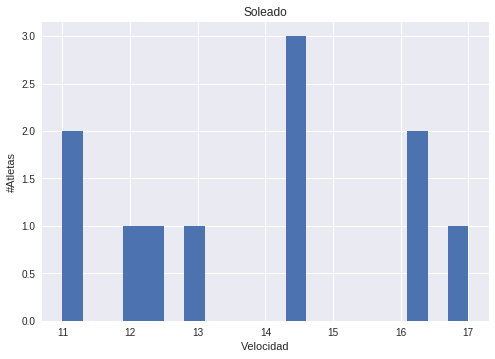

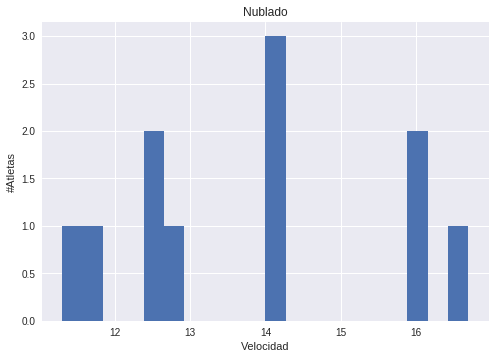

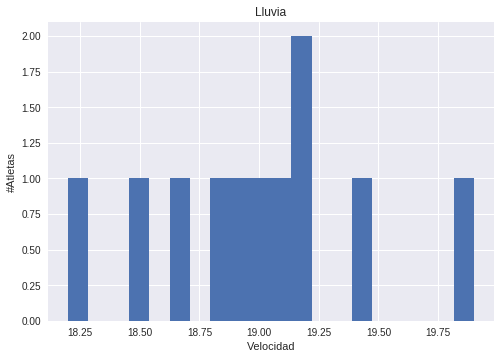

In [14]:
sns.plt.hist(datosLimpios['tiempo_sol'], bins=20)
sns.plt.title('Soleado')
sns.plt.xlabel('Velocidad')
sns.plt.ylabel('#Atletas')
sns.plt.show()

sns.plt.hist(datosLimpios['tiempo_nublado'], bins=20)
sns.plt.title('Nublado')
sns.plt.xlabel('Velocidad')
sns.plt.ylabel('#Atletas')
sns.plt.show()

sns.plt.hist(datosLimpios['tiempo_lluvia'], bins=20)
sns.plt.title('Lluvia')
sns.plt.xlabel('Velocidad')
sns.plt.ylabel('#Atletas')
sns.plt.show()

Al ver los gráficos no podemos obtener ninguna conclusión, entendiendo que quizás la poca cantidad de datos disponibles sea una de las causas de no poder obtener gráficos más claros.

Aún así nos pareció interesante resaltar la idea de que nunca vamos a poder afirmar que una muestra proviene de una distribución normal y que, dependiendo del grado de rigurosidad del estudio, se podría complementar con algunas nociones gráficas.

### Hipótesis 3: Igual Varianza

Para corroborar esta hipótesis vamos a utilizar el test de levene. El mismo nos va a permitir testear si las poblaciones subyacentes tienen igual varianza. Como en el caso del testeo de la normalidad de los datos, lo único que el test nos va a permitir chequear es si podemos rechazar o no la hipótesis previamente dicha, es decir, que las distribuciones de donde pudieran provenir estos datos tienen igual varianza.

In [11]:
def equal_variance(data):
    t, p_value = sp.stats.levene(data['tiempo_sol'], data['tiempo_nublado'], data['tiempo_lluvia'])
    print(p_value)
    return p_value > 0.05

igual_varianza = equal_variance(datosLimpios)

print(igual_varianza)

0.00406149463441
False


Lamentablemente en este caso vemos que el p-value obtenido está por debajo de la cota utilizada. Esto nos daría cierta evidencia como para rechazar la idea de que los datos provienen de distribuciones con igual varianza y por lo tanto, al no cumplir con esta hipótesis no vamos a poder utilizar los T-Tests. 
Sin embargo, y dado que la cota establecida es arbitraria, asumiremos que esta hipótesis si se cumple, para de esta forma poder utilizar los T-Tests, pero siempre teniendo en cuenta que las concluciones que obtengamos son más bien débiles o hasta quizás erróneas.

# Tests y Conclusiones:

En esta sección vamos a analizar caso a caso las preguntas sugeridas por el enunciado, indicando el test utilizado y conclusiones de sus resultados.

Los items a evaluar son los siguientes:

- El cielo nublado no influye en los tiempos de los atletas
- La velocidad en días de lluvia es independiente del atleta
- El clima influye en la velocidad de los atletas
- Los atletas son más lentos en días de lluvia que en días soleados


### El cielo nublado no influye en los tiempos de los atletas:

Para poder decir que el día nublado influye o no en los tiempos de los atletas tenemos que poder definir que quiere decir que influya, es decir, qué es lo que se ve afectado, con respecto a qué y de qué modo. 
A nuestro entender, las condiciones normales para que se desempeñe un corredor son los días soleados, por lo tanto queremos ver si, en los días nublados, los tiempos en promedio difieren o no de los días soleados.

Por lo tanto, lo que queremos ver es si es posible que las muestras provengan de distribuciones con igual media.

Para este experimento utilizamos el t-test de muestras apareadas aprovechando que la identificación del atleta es la constante que relaciona las distintas muestras.

En este caso, la hipótesis nula es que los datos provienen de distribuciones con igual media, por lo que si obtenemos un p-value menor a 0.05 podríamos estar en condiciones de rechazar esta idea, es decir, podríamos llegar a afirmar que no provienen de datos con igual media.
Sin embargo, y como en el resto de los casos, si obtenemos un p-value mayor a la cota utilizada, no nos va a permitir afirmar lo contrario, o sea, la igualdad de las medias.

In [15]:
sp.stats.ttest_rel(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado'])

Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)

Al correr el test podemos observar un p-value muy grande, casi 1, por lo que no solo no podemos rechazar que vengan de muestras con igual media, sino que estamos demasiado lejor de poder dar hacerlo, y estamos "más cerca" de poder decir que provienen de distribuciones con igual media. 

Por lo tanto, en los días nublados, en comparación con los soleados, no hay influencia del clima respecto a los tiempos registrados por los atletas.

### La velocidad en días de lluvia es independiente del atleta:

Para este experimento vamos a verificar si existe algún tipo de correlacion entre los datos para poder realizar una aproximación al resultado de los días de lluvia en base a los datos de los días soleados o nublados.

Para esto es razonable pensar un modelo en el cual si un corredor es bueno en días soleados/nublados, entonces también lo es en días con lluvia y un mal corredor en las mejores condiciones, tendrá un desempeño similar bajo el contexto de la lluvia.

Para esto vamos a utilizar la correlacion de Pearson, que mide si existe una correlación lineal de los datos.

In [18]:
print(sp.stats.pearsonr(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado']))

print(sp.stats.pearsonr(datosLimpios['tiempo_sol'], datosLimpios['tiempo_lluvia']))

(0.99224199979513195, 1.8469595486418115e-09)
(0.064963553876733887, 0.84949358072453474)


Como podemos notar, en el primer caso, entre días de sol y días con nubes vemos una gran correlación positiva. Esto, según el modelo que planteamos, implicaría que un buen corredor con clima soleado se desempeña de forma similar con clima nublado.

Analicemos ahora si existe correlación entre los días de buen clima y los días lluviosos. 
Como podemos notar, el coeficiente de correlación de Pearson es muy chico, lo cual nos indica que no hay gran correlación entre los datos. 
Finalmente, lo que podemos decir es que la velocidad en días de lluvia es independiente del atleta, ya que si así no fuera, podríamos observar una correlación de las velocidades con respecto a los días soleados, y esto no pasa.

Es importante resaltar que la correlación puede existir en base a otro modelo, y el hecho de que no la hayamos encontrado con este modelo no quiere decir que no exista. Aún así, entendemos que el modelo planteado es bastante razonable.


### El clima influye en la velocidad de los atletas:

Para este caso, queremos poder ver si los tiempos de los tres conjuntos de datos provienen o no de distribuciones con igual media.

El test ANOVA nos proporciona una funcionalidad que chequea lo que estamos queriendo analizar, veamos que resultado obtenemos:

In [19]:
print(sp.stats.f_oneway(datosLimpios['tiempo_sol'], datosLimpios['tiempo_nublado'], datosLimpios['tiempo_lluvia']))

F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)


Obtuvimos un p-calue muy chico, claramente por debajo de la cota que hemos utilizado durante todo este trabajo. Por tal motivo creemos que tenemos evidencia suficiente como para rechazar la hipótesis nula del test, que los datos provienen de distribuciones con igual media.

Por lo tanto, como conclusión de todo esto, podríamos afirmar que efectivamente el clima si influye en la velocidad de los atletas.

### Los atletas son más lentos en días de lluvia que en días soleados: 

Para este punto decidimos hacer dos estudios distintos, uno mediante un t-test y otro haciendo un análisis de permutaciones.

El t-test utilizado es nuevamente el de muestras apareadas, pero en este caso no solo queremos ver que las muestras provienen de datos con igual media, sino que además queremos ver que la media de los días lluviosos es mayor a la media de los días soleados, y es por eso que nos pareció interesante volver a recurrir a este test, ya que haciendo un análisis de una sola cola podemos llegar a obtener dicha conclusión.

In [21]:
sp.stats.ttest_rel(datosLimpios['tiempo_sol'], datosLimpios['tiempo_lluvia'])

Ttest_relResult(statistic=-8.1659802299869533, pvalue=9.832130127750511e-06)

Hemos obtenido un p-value bajo, menor a 0.05, lo cual nos permite rechazar la hipótesis nula y decir que los datos no tienen poblaciones subyacentes con igual media. Más allá de esto, queríamos ver si la media de los días de lindo clima era inferior a la media de los días de lluvia, y, para este test, eso lo podemos determinar utilizando el estadístico obtenido como resultado, que al haber sido negativo nos indica que nuestra suposición era correcta, es decir, la media de los días de lluvia es superior a la de los días de sol.



Hagamos ahora un análisis de permutaciones.

En cuanto a la implementación, la idea es unificar los datos de días de lluvia y de sol, hacer un shuffle de los datos y, aprovechando que tenemos la misma cantidad de tiempos para cada clima, las etiquetas serán las mismas entre sí en la primera mitad de los datos, y análogamente, los tags serán los mismos en la segunda mitad.
Luego, simplemente calcularemos las medias de cada parte, las restaremos y guardaremos el resultado en un array, donde iremos dejando este valor obtenido en cada iteración de este proceso.
Por último solo nos queda contar la cantidad diferencias de medias que resultaron iguales o mayores a la original, o sea, a la diferencia que existía en la muestra original, donde sabíamos a qué día correspondía cada tiempo.


5e-05


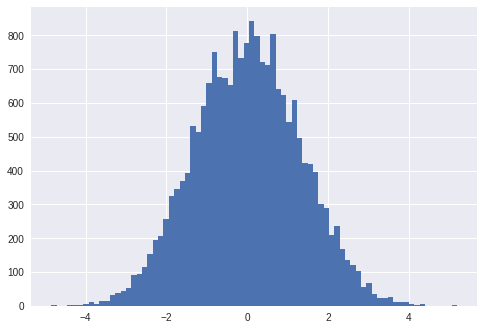

In [22]:
res = []


shuff =  datosLimpios['tiempo_sol'].append(datosLimpios['tiempo_lluvia'], ignore_index=True)

for i in range(20000):
    media1 = (shuff[:11]).mean() # etiqueta sol
    media2 = (shuff[11:]).mean() # etiqueta lluvia
    diferencia = media2 - media1 # diferencia de medias
    res.append(diferencia)
    shuff = shuff.sample(frac=1) # volvemos a shufflear los datos


# res[0] se corresponde a la diferencia de medias de los datos con la etiqueta original
p_value = len([x for x in res if x >= res[0]]) / len(res)
    
print(p_value) 


sns.plt.hist(res, bins='auto')
sns.plt.show()

Como primer punto, podemos notar que nuestro p_value es 1/20000, por lo que no hubo etiquetado que tuviera igual o mayor diferencia de medias respecto al etiquetado original. 
Si ahondamos en esto, realmente tiene sentido, ya que los tiempos para cada corredor en los días de lluvia era superior a su tiempo en los días soleados, por lo que cualquier otro etiquetado iba a resultar en una diferencia de medias menor o igual, siendo igual el caso en el que se hayan agrupado los días de lluvia nuevamente juntos (pero en otro orden) y lo mismo para los tiempos de días soleados. 

Una vez obtenido el p-value, al compararlo con nuestra cota de referencia, creemos que podemos rechazar la hipótesis nula de que las muestras provienen de distribuciones con igual media, y no solo eso, sino que la media de los días soleados es inferior a la de los días de lluvia.

# Consejos y conclusiones

Durante el estudio y análisis de los datos podríamos concluír a grandes rasgos que en días soleados y nublados los corredores presentan un desempeño similar. Sin embargo, los días de lluvia el desempeño no solo es inferior sino que tampoco pudimos encontrar una correlación entre los tiempos de los corredores y el clima. 

Por lo tanto, nuestra sugerencia es que los días de lluvia se debe entrenar pero con la única finalidad de poder medir el desempeño de los atletas en los días con dicho clima, de ninguna forma tratando de sacar concluciones para carreras con climas soleados o nublados. De igual forma, entendemos que no tendría sentido no entrenar los días lluviosos, dado que, utilizando solo los tiempos medidos en días con buen clima, no podría sacar ninguna conclusión válida respecto a los días de mal clima.